<a href="https://colab.research.google.com/github/sanjana786/DevUP_ML/blob/main/Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [ ]:
car=pd.read_csv('quikr_car.csv')

In [ ]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [ ]:
car.shape

(892, 6)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [ ]:
#Creating backup copy
backup=car.copy()

In [ ]:
# Quality
# names are pretty inconsistent
# names have company names attached to it
# some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
# company: many of the names are not of any company like 'Used', 'URJENT', and so on.
# year has many non-year values
# year is in object. Change to integer
# Price has Ask for Price
# Price has commas in its prices and is in object
# kms_driven has object values with kms at last.
# It has nan values and two rows have 'Petrol' in them
# fuel_type has nan values

In [ ]:
# Cleaning Data
# year has many non-year values
car=car[car['year'].str.isnumeric()]

In [ ]:
#year is in object. Change to integer
car['year']=car['year'].astype(int)


In [ ]:
#Price has Ask for Price
car=car[car['Price']!='Ask For Price']

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        815 non-null    object
 1   company     815 non-null    object
 2   year        815 non-null    int64 
 3   Price       815 non-null    int64 
 4   kms_driven  815 non-null    int64 
 5   fuel_type   815 non-null    object
dtypes: int64(3), object(3)
memory usage: 76.9+ KB


In [ ]:
#Price has commas in its prices and is in object
car['Price']=car['Price'].str.replace(',','').astype(int)

In [ ]:
#kms_driven has object values with kms at last.
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

In [ ]:
#It has nan values and two rows have 'Petrol' in them
car=car[car['kms_driven'].str.isnumeric()]

In [ ]:
car['kms_driven']=car['kms_driven'].astype(int)

<ipython-input-44-de01a420cef2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['kms_driven']=car['kms_driven'].astype(int)


In [ ]:
#fuel_type has nan values
car=car[~car['fuel_type'].isna()]

In [ ]:
car.shape

(816, 6)

In [ ]:
#Company does not need any cleaning now. Changing car names. Keeping only the first three words
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [ ]:
#Resetting the index of the final cleaned data
car=car.reset_index(drop=True)

In [ ]:
#Cleaned Data
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [ ]:
car.to_csv('Cleaned_Car_data.csv')

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [ ]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [ ]:
car=car[car['Price']<6000000]

In [ ]:
#Checking relationship of Company with Price
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [ ]:
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.7% of the points cannot be placed

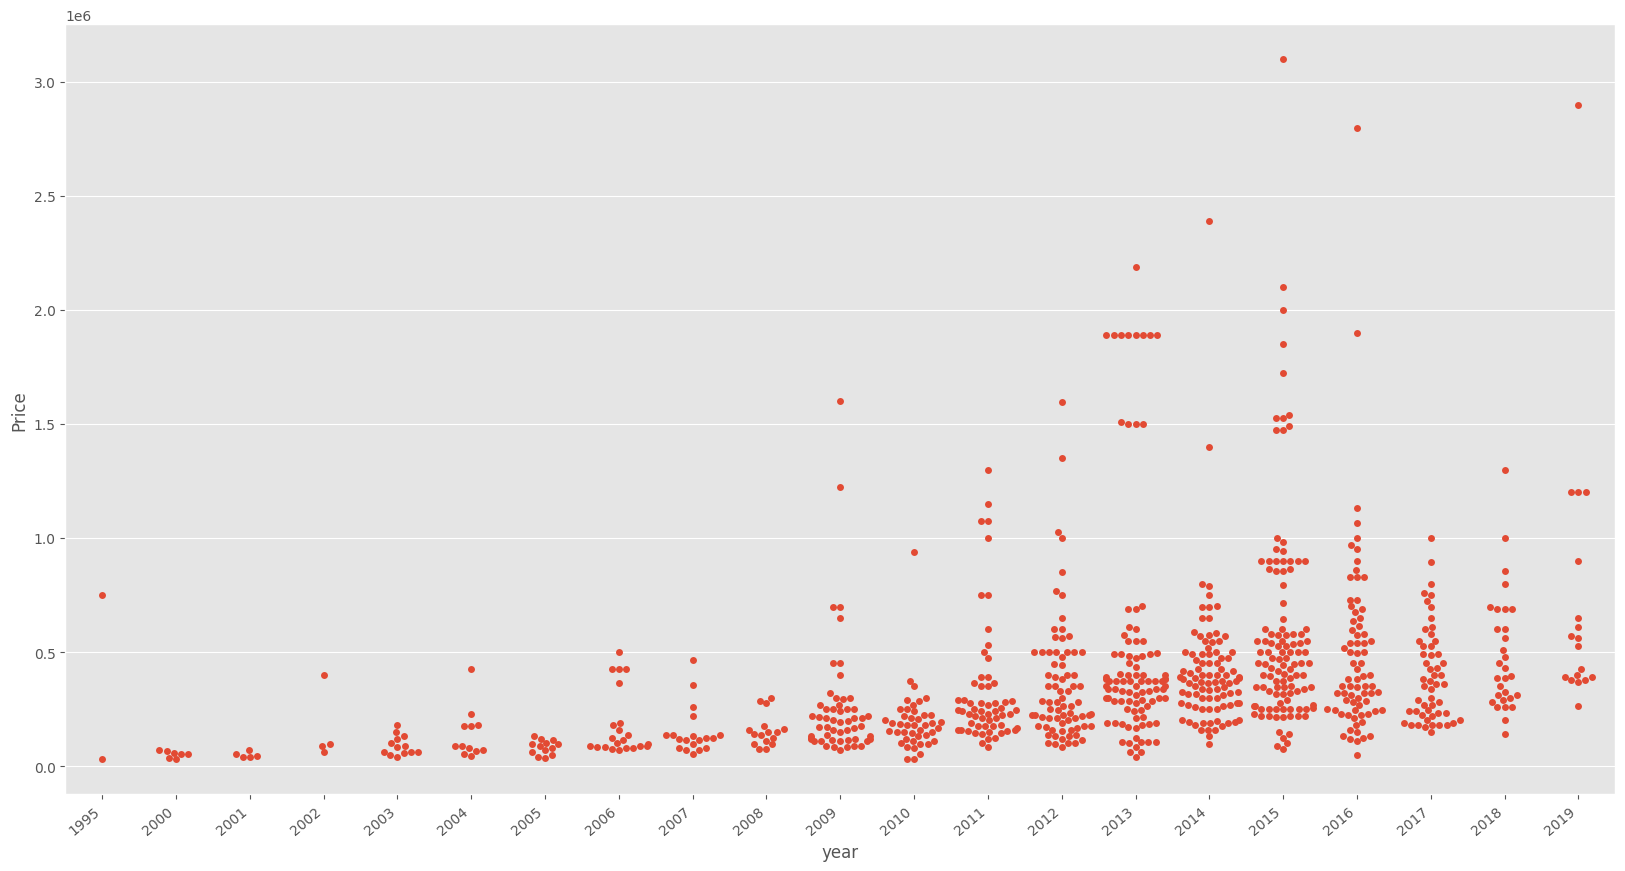

In [ ]:
#Checking relationship of Year with Price
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

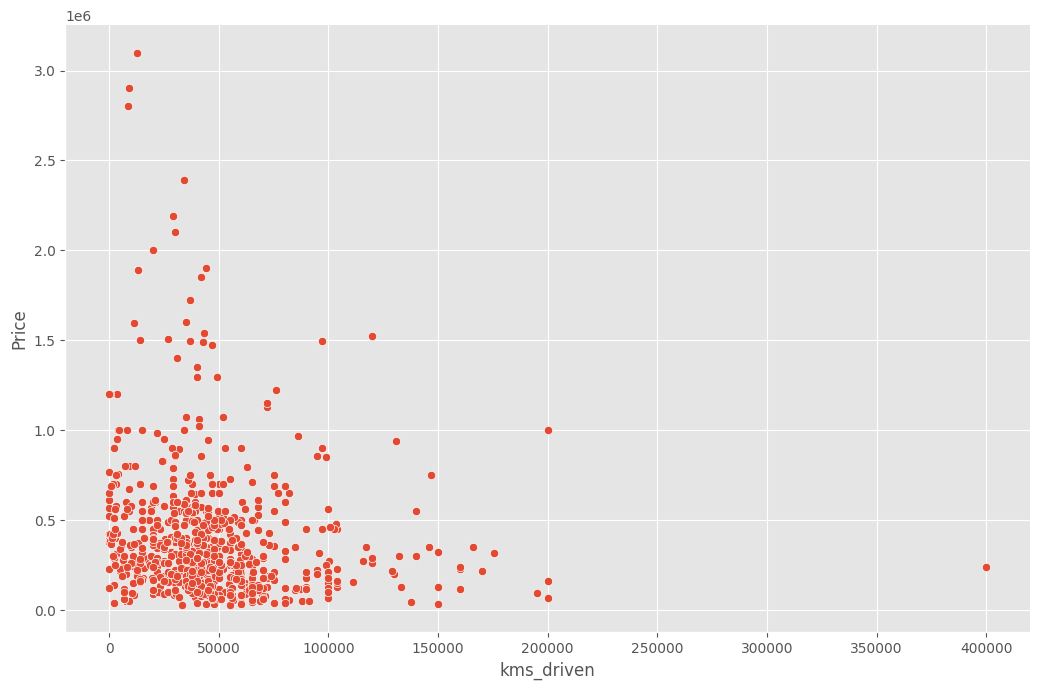

In [ ]:
#Checking relationship of kms_driven with Price
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

In [ ]:
#Extracting Training Data
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [ ]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [ ]:
y.shape

(815,)

In [ ]:
#Applying Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [ ]:
#Creating an OneHotEncoder object to contain all the possible categories
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [ ]:
#Creating a column transformer to transform categorical columns
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [ ]:
#Linear Regression Model
lr=LinearRegression()

In [ ]:
#Making a pipeline
pipe=make_pipeline(column_trans,lr)

In [ ]:
#Fitting the model
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred=pipe.predict(X_test)

In [ ]:
y_pred

array([2240480.64094365,  226431.9937706 ,  163985.14734587,
         23125.58245051,  419175.55201872,   24556.10249367,
        410313.90625451,  604540.7364141 ,  217043.48420887,
        340364.26057313,  246186.86935455,  486108.9609415 ,
        450970.9320078 ,  162002.52977884,  893635.64225933,
        510433.53556612,  616486.62341737,  375107.93717447,
        580824.73123299,  -11480.54169212,  411848.24361354,
        428144.12343986,  514772.8049825 ,  126210.44735159,
        341050.64258797, 2240480.64094365,  373060.62105796,
         39658.2550637 ,  154434.48551681,  607323.51132189,
        476025.11847077,  367442.39613931,   35869.03589284,
        260977.46974113,  313439.99874917,  384142.33221188,
        229263.02762889,  463673.10597641,  392789.76139119,
        358949.6791714 , 1146681.60242574,  325748.43177974,
        425387.84483787,  289809.07344875,  577458.07487926,
         30218.17021024,  612289.42554202,   77562.01713477,
         49439.42756628,

In [ ]:
#Checking R2 Score
r2_score(y_test,y_pred)

0.7396208941239428

In [ ]:
#Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score
scores=[]
for i in range(10):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [ ]:
np.argmax(scores)

4

In [ ]:
scores[np.argmax(scores)]

0.7936282883865851

In [ ]:
scores[4]

0.7936282883865851

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.7936282883865851